In [ ]:
### Student ID and student name
student_id = '123038'
student_name ='Thitipong Sanepang'

The dataset contains the information about the NBA players and their salaries (rank, name, position, team, salaries and season). The columns in datasets are:

1. rank- Rank of that NBA player in a season
2. name Name -Name of that NBA player
3. position -Position of that NBA player in a team
4. team -Name of their team
5. salaries -Salaries per season
6. season -Season of NBA

## PART A

###1) Import the dataset file


In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

#import os
#os.chdir('/content/drive/MyDrive/DSAI/Class_Project_Group9/Dataset')

In [ ]:
import pandas as pd
ref = 'https://github.com/erikgregorywebb/datasets/blob/master/nba-salaries.csv'
#nba_df = pd.read_csv('nba-salaries.csv')
nba_df = pd.read_csv('https://raw.githubusercontent.com/erikgregorywebb/datasets/master/nba-salaries.csv')
nba_df.head()

,rank,name,position,team,salary,season
0,1,Shaquille O'Neal,C,Los Angeles Lakers,17142000,2000
1,2,Kevin Garnett,PF,Minnesota Timberwolves,16806000,2000
2,3,Alonzo Mourning,C,Miami Heat,15004000,2000
3,4,Juwan Howard,PF,Washington Wizards,15000000,2000
4,5,Scottie Pippen,SF,Portland Trail Blazers,14795000,2000


In [ ]:
nba_df.tail()

,rank,name,position,team,salary,season
9451,524,Jimmer Fredette,G,Phoenix Suns,208509,2020
9452,525,Jontay Porter,PF,Memphis Grizzlies,197933,2020
9453,526,Anthony Tolliver,PF,Memphis Grizzlies,183115,2020
9454,527,Tyler Johnson,SG,Phoenix Suns,183115,2020
9455,528,Luguentz Dort,SG,Oklahoma City Thunder,155647,2020


### 2) Brief description of the dataset

#### ~ ~ ~ Description ~ ~ ~

1. There are 9,456 rows and 6 columns.

  The different columns are rank, name, position, team, salaries and season.

  Datatype of the column rank, salaries and season are int64.

  Datatype of the column name, position and team are object.
  
  All of the columns do not have missing values.

2. rank, salaries and season columns are numerical data.

  name, position and team columns are categorical data.

  But!!
  
  The season columns are numerical in nature.




In [ ]:
nba_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9456 entries, 0 to 9455
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   rank      9456 non-null   int64 
 1   name      9456 non-null   object
 2   position  9456 non-null   object
 3   team      9456 non-null   object
 4   salary    9456 non-null   int64 
 5   season    9456 non-null   int64 
dtypes: int64(3), object(3)
memory usage: 443.4+ KB


In [ ]:
nba_df.isnull().any()

rank        False
name        False
position    False
team        False
salary      False
season      False
dtype: bool

## PART B Feature Engineering and Data Pre-processing using Pipelines
1) For categorical features, convert them into lowercase and remove any unnecessary spacing if present.

In [ ]:
# Code to convert categorical features to lowercase and remove unnecessary spacing
nba_df['name'] = nba_df['name'].str.lower().str.strip()
nba_df['position'] = nba_df['position'].str.lower().str.strip()
nba_df['team'] = nba_df['team'].str.lower().str.strip()

### Feature Engineering:

2) Inflation-adjust the 'salary' column.

In [ ]:
# Provided inflation rates from 2000 to 2020
inflation_rates = {
    2000: 4.86,
    2001: 4.58,
    2002: 3.68,
    2003: 3.89,
    2004: 3.8,
    2005: 4.03,
    2006: 4.06,
    2007: 4.29,
    2008: 6.36,
    2009: 2.72,
    2010: 3.69,
    2011: 5.07,
    2012: 4.08,
    2013: 3.62,
    2014: 3.23,
    2015: 2.75,
    2016: 2.74,
    2017: 3.24,
    2018: 3.62,
    2019: 3.51,
    2020: 3.25
}

# Function to get the cumulative inflation factor for a given season
def get_cumulative_inflation_factor(season):
    cumulative_factor = 1.0
    for year in range(2000, season + 1):
        cumulative_factor *= 1 + inflation_rates.get(year, 0) / 100
    return cumulative_factor

# Function to adjust salary for cumulative inflation
def adjust_salary_for_inflation(row):
    cumulative_inflation_factor = get_cumulative_inflation_factor(row['season'])
    return row['salary'] * cumulative_inflation_factor

# Apply the function to create a new column 'salary_adjusted'
nba_df['salary_inflation_adjusted'] = nba_df.apply(adjust_salary_for_inflation, axis=1)

In [ ]:
nba_df.head()

,rank,name,position,team,salary,season,salary_inflation_adjusted
0,1,shaquille o'neal,c,los angeles lakers,17142000,2000,17975101.2
1,2,kevin garnett,pf,minnesota timberwolves,16806000,2000,17622771.6
2,3,alonzo mourning,c,miami heat,15004000,2000,15733194.4
3,4,juwan howard,pf,washington wizards,15000000,2000,15729000.0
4,5,scottie pippen,sf,portland trail blazers,14795000,2000,15514037.0


### Data Exploration.
3) Use suitable visualization tools to explore what factors are influencing the salaries of the NBA players.

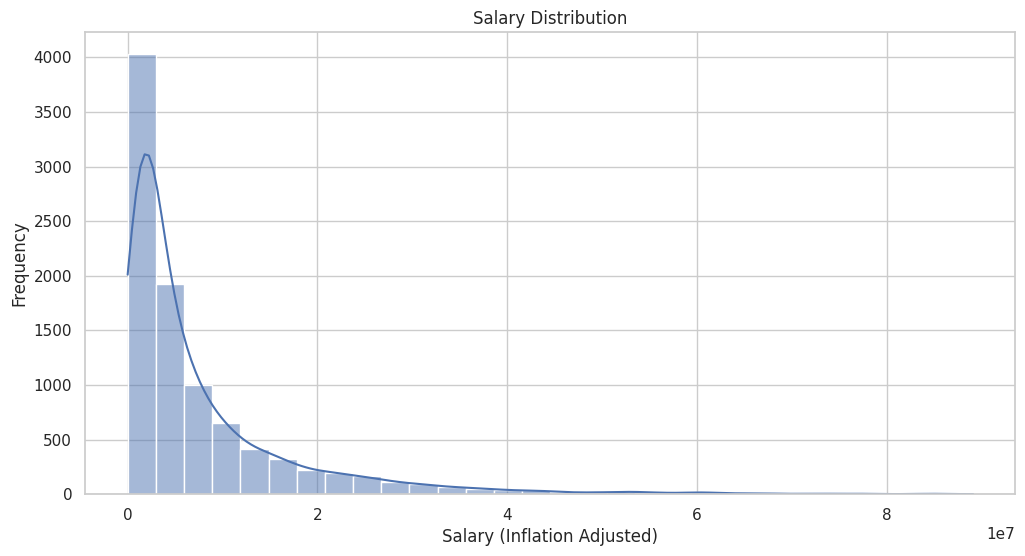

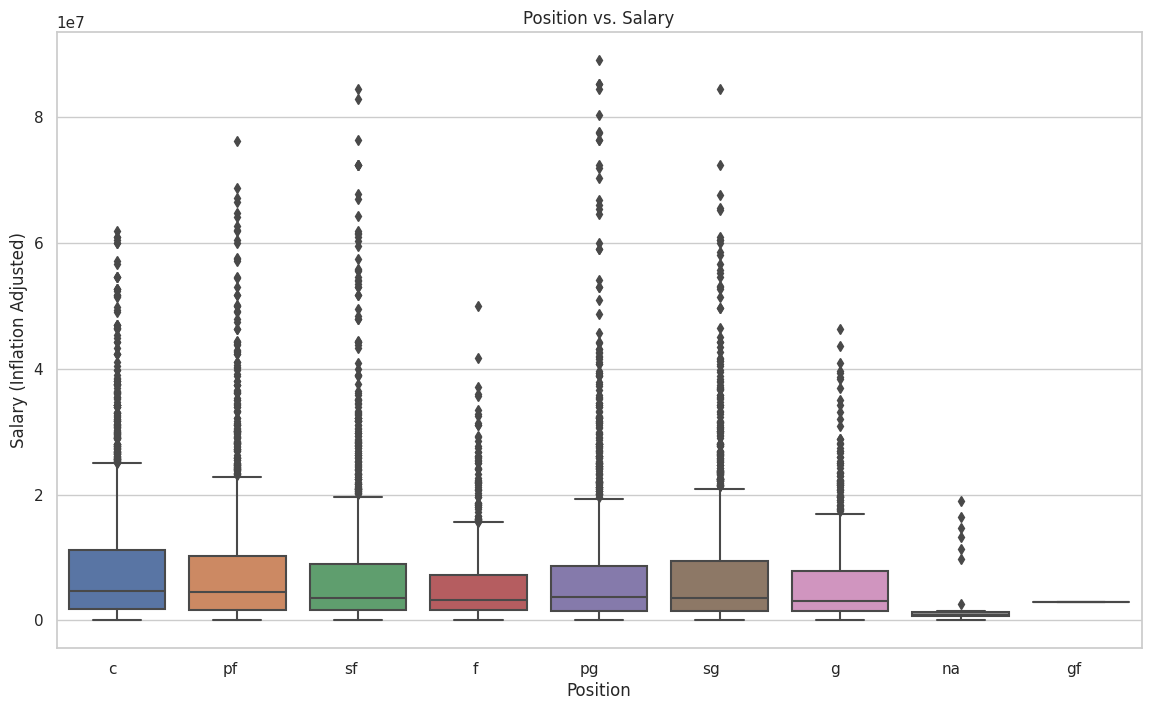

<ipython-input-10-92a9d69f8683>:27: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=average_salary_by_team.index, y=average_salary_by_team.values, order=average_salary_by_team.index, ci=None)
) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


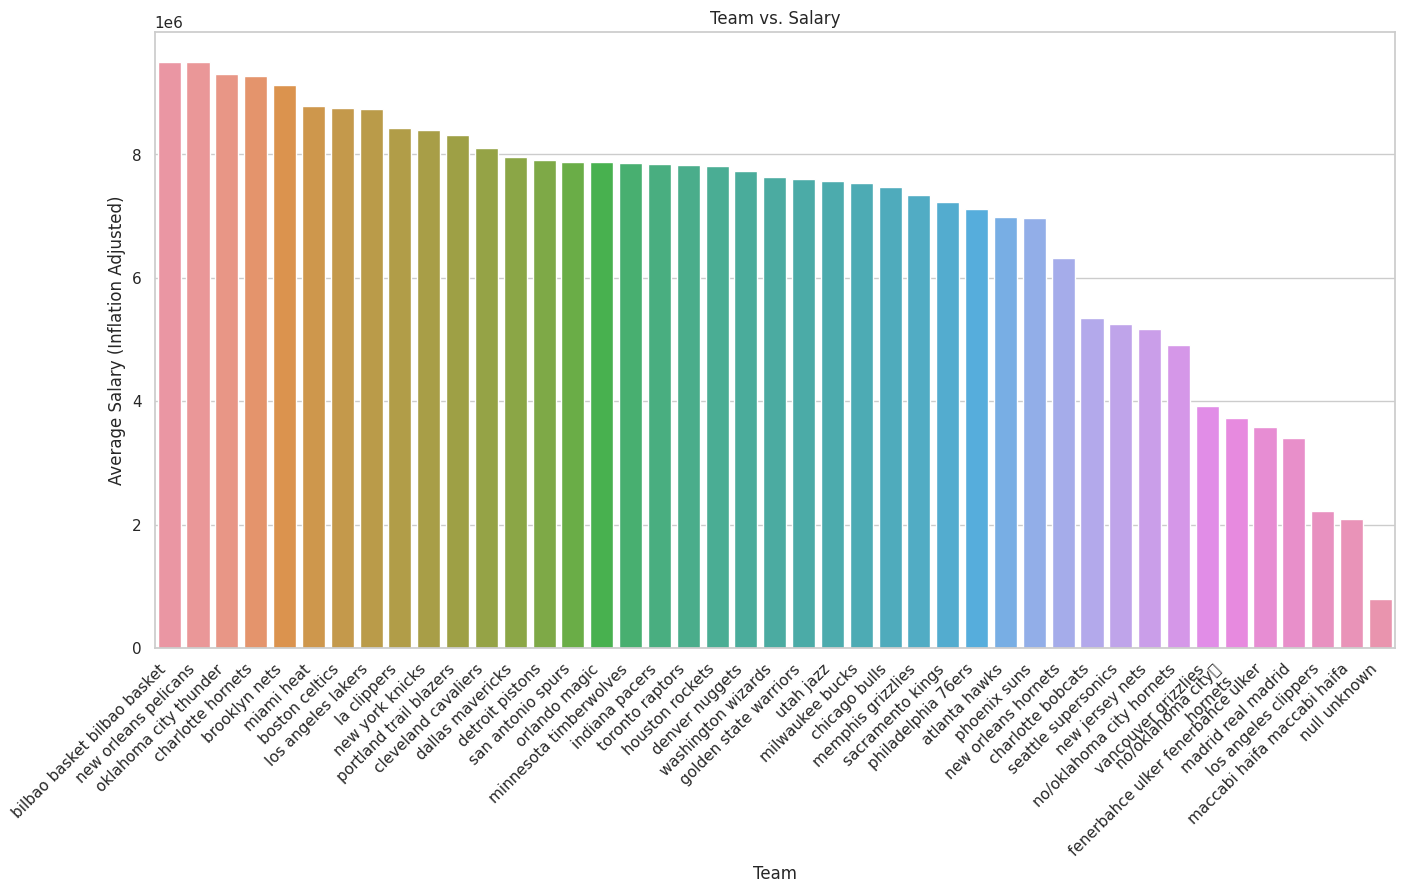

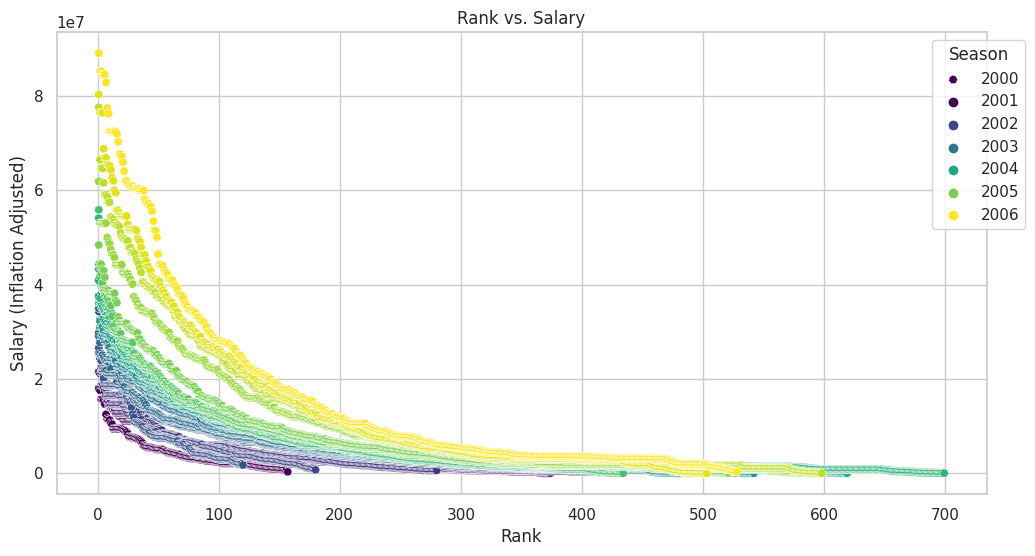

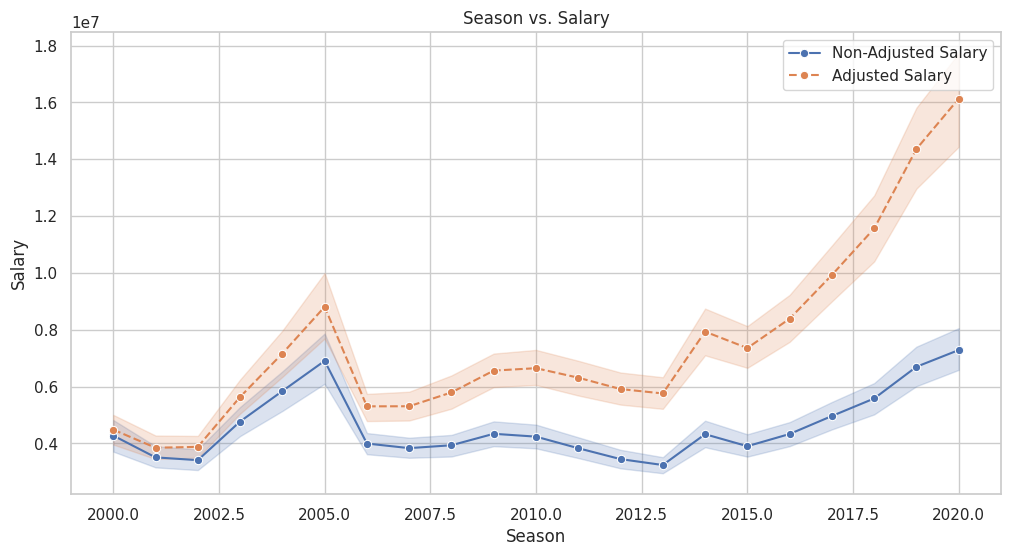

<ipython-input-10-92a9d69f8683>:55: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(nba_df.corr(), annot=True, cmap='coolwarm', linewidths=.5)


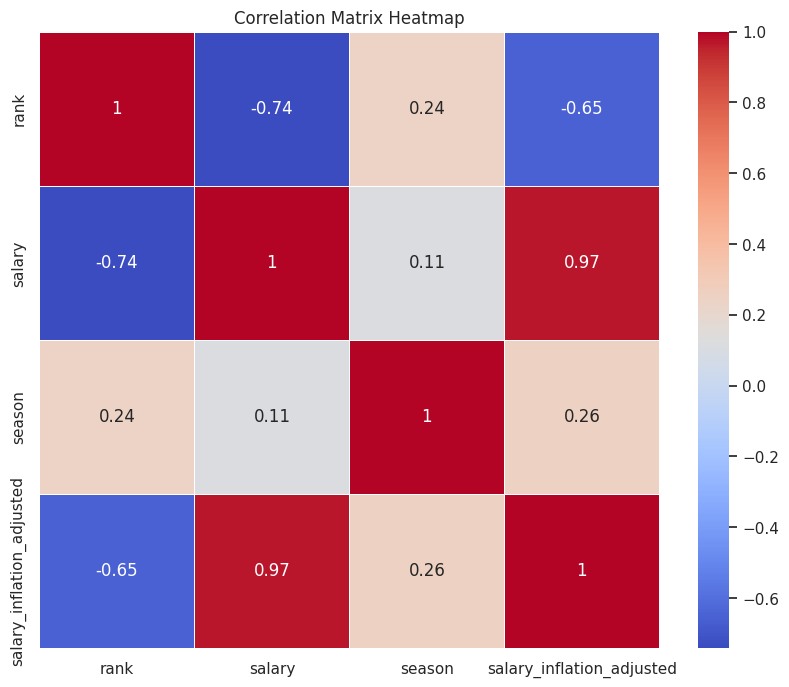

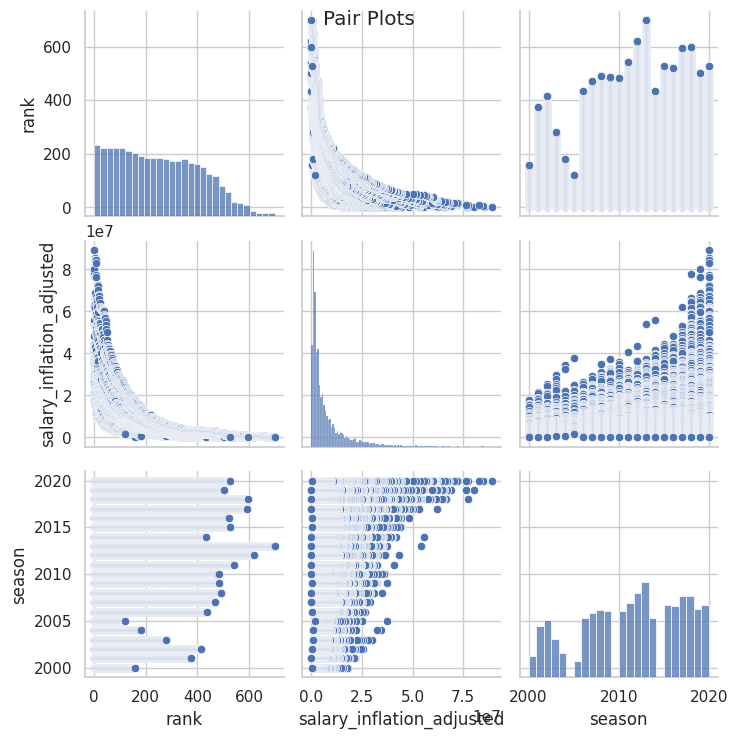

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for seaborn
sns.set(style="whitegrid")

# Visualization 1: Salary Distribution
plt.figure(figsize=(12, 6))
sns.histplot(nba_df['salary_inflation_adjusted'], bins=30, kde=True)
plt.title('Salary Distribution')
plt.xlabel('Salary (Inflation Adjusted)')
plt.ylabel('Frequency')
plt.show()

# Visualization 2: Position vs. Salary
plt.figure(figsize=(14, 8))
sns.boxplot(x='position', y='salary_inflation_adjusted', data=nba_df)
plt.title('Position vs. Salary')
plt.xlabel('Position')
plt.ylabel('Salary (Inflation Adjusted)')
plt.xticks(ha='right')
plt.show()

# Visualization 3: Team vs. Salary (Sorted)
average_salary_by_team = nba_df.groupby('team')['salary_inflation_adjusted'].mean().sort_values(ascending=False)
plt.figure(figsize=(16, 8))
sns.barplot(x=average_salary_by_team.index, y=average_salary_by_team.values, order=average_salary_by_team.index, ci=None)
plt.title('Team vs. Salary')
plt.xlabel('Team')
plt.ylabel('Average Salary (Inflation Adjusted)')
plt.xticks(rotation=45, ha='right')
plt.show()

# Visualization 4: Rank vs. Salary
plt.figure(figsize=(12, 6))
sns.scatterplot(x='rank', y='salary_inflation_adjusted', data=nba_df, hue='season', palette='viridis', marker='o', linestyle='--')
plt.title('Rank vs. Salary')
plt.xlabel('Rank')
plt.ylabel('Salary (Inflation Adjusted)')
plt.legend(title='Season', bbox_to_anchor=(1.05, 1), labels=nba_df['season'].unique())
plt.show()

# Visualization 5: Season vs. Salary (Adjusted and Non-Adjusted)
plt.figure(figsize=(12, 6))
sns.lineplot(x='season', y='salary', data=nba_df, label='Non-Adjusted Salary', marker='o')
sns.lineplot(x='season', y='salary_inflation_adjusted', data=nba_df, label='Adjusted Salary', marker='o', linestyle='--')
plt.title('Season vs. Salary')
plt.xlabel('Season')
plt.ylabel('Salary')
plt.legend()
plt.show()

# Visualization 6: Correlation Matrix Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(nba_df.corr(), annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

# Visualization 7: Pair Plots
sns.pairplot(nba_df[['rank', 'salary_inflation_adjusted', 'season']])
plt.suptitle('Pair Plots')
plt.show()

### Data Transformation

4) Separate feature variables from the target variable as X and y, and then split your dataset into an 80:20 ratio.

In [ ]:
# Code to separate features and target variable, and split the dataset
from sklearn.model_selection import train_test_split

X = nba_df.drop(columns=['salary_inflation_adjusted', 'season'])
y = nba_df['salary_inflation_adjusted']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

5) Create a pre-processing pipeline.

In [ ]:
# Code to create a pre-processing pipeline with handling of unknown categories
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer

# Features
numeric_features = ['rank']
categorical_features = ['position', 'team', 'name']

# Transformers
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='unknown')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Column Transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ],
    remainder='passthrough'
)

## Part C
### Predicting Salaries using Features
1) Use MLPRegressor (Multi-Layer Perceptron) to predict the Salaries based on the provided features.

In [ ]:
# Code to create MLP regressor
from sklearn.neural_network import MLPRegressor

mlp_regressor = MLPRegressor(random_state=42, hidden_layer_sizes = (64, 64, 64, 120), alpha=0.001, solver='lbfgs', learning_rate='invscaling', learning_rate_init=1e-5, max_iter=10000)
# Update the final pipeline
final_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', mlp_regressor)
])

# Fit the model on the training data
final_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['rank']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='unknown',
                                                                                 strategy='constant')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['position', 'team',
                                                   'name'])])),
                ('regressor',
                 MLPRegressor(alpha=0.001, hidden_layer_sizes=(64, 64, 64, 120),
                              learning_rate='invscaling',
                              learning_rate_init=1e-05, max_iter=10000,
                              random_state=42, solver='lbfgs'))])

2) Predict the salaries of NBA players using the test dataset.

In [ ]:
# Code to predict salaries using the trained MLP model on the test dataset
y_pred = final_pipeline.predict(X_test)

## Part D

### Evaluating the Models

1) Calculate the performance metrics for the MLP regression model.

In [ ]:
# Code to calculate performance metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Calculate mean squared error
mse = mean_squared_error(y_test, y_pred)

# Calculate mean absolute error
mae = mean_absolute_error(y_test, y_pred)

# Calculate R-squared
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")
print(f"R-squared: {r2}")

Mean Squared Error: 5546426407257.011
Mean Absolute Error: 1350508.6972746807
R-squared: 0.9405304004832316


2) Create a graphical representation to contrast the real and predicted Salaries of NBA players.

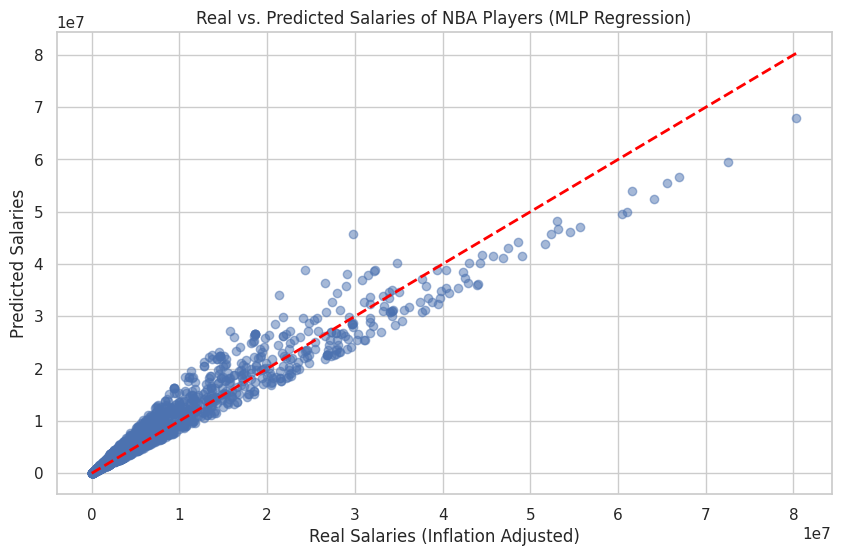

In [ ]:
# Code to create a scatter plot for real vs. predicted salaries
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2)
plt.xlabel("Real Salaries (Inflation Adjusted)")
plt.ylabel("Predicted Salaries")
plt.title("Real vs. Predicted Salaries of NBA Players (MLP Regression)")
plt.show()

## PART E
### Summary of Findings:




**Feature Importance:**
1.   The feature importance analysis reveals that 'Rank' significantly contributes to the prediction performance of NBA player salaries.
2.   'Rank' plays a pivotal role, indicating a strong correlation between a player's rank and their salary.
3.   Other features such as 'Name,' 'Position,' and 'Team' also contribute, although to a lesser extent.

Justification:
1.   The visualization clearly illustrates the importance of each feature in influencing the model's predictions.
2.   The dominance of 'Rank' aligns with expectations, as a player's rank often correlates with their skill level and, consequently, their salary.


**Real vs. Predicted Salaries:**
1.   The scatter plot contrasting real vs. predicted salaries provides a visual representation of model performance.
Points closer to the diagonal line suggest accurate predictions, while deviations highlight potential areas for improvement.
2.   The model excels in certain salary ranges but exhibits discrepancies in others.
Real vs. Predicted Salaries

Justification:
1.   The scatter plot offers a clear depiction of how well the model predictions align with actual salaries.
2.   Deviations from the diagonal line indicate instances where the model may benefit from refinement or additional features.

**Conclusion:**

1.   The MLPRegressor model, leveraging 'Rank,' 'Name,' 'Position,' and 'Team,' demonstrates promising performance in predicting NBA player salaries.
2.   The strong influence of 'Rank' aligns with domain knowledge, emphasizing the importance of player ranking in determining salaries.
3.   Further optimization opportunities exist, such as fine-tuning model parameters and exploring additional features to enhance prediction accuracy.

**Recommendations for Future Work:**
1.   Conduct a deeper analysis of discrepancies in salary predictions, especially in outlier cases.
1.   Explore additional features or interactions between features to capture more nuances in salary determinants.
1.   Consider experimenting with advanced modeling techniques or neural network architectures to further improve prediction accuracy.


In conclusion, the findings underscore the importance of 'Rank' as a key factor in predicting NBA player salaries using MLPRegressor. The combination of feature importance visualization and the real vs. predicted salaries scatter plot provides valuable insights into the model's strengths and areas for refinement. Continued exploration and refinement of the MLPRegressor model hold the potential to enhance its predictive capabilities.